In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [11]:
# Load the datasets
dataset = pd.read_csv('NEV_fault_dataset.csv')
training_dataset = pd.read_csv('NEV_fault_training_dataset.csv')
testing_dataset = pd.read_csv('NEV_fault_testing_dataset.csv')

# Display the first few rows of the dataset
dataset.head()

,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Fault Label
0,0.938922,0.199535,0.544403,0.239508,0.301284,0.582435,0.397340,0.0
1,0.804854,0.597188,0.073416,0.180373,0.920876,0.128203,0.124523,1.0
2,0.949877,0.426896,0.083007,0.251436,0.610996,0.714957,0.003283,1.0
3,0.954370,0.121175,0.962771,0.377942,0.070619,0.776723,0.502552,0.0
4,0.810464,0.382501,0.557223,0.048694,0.078834,0.326350,0.168493,0.0


In [15]:
# Check for missing values
dataset.isnull().sum()

Voltage (V)          0
Current (A)          0
Motor Speed (RPM)    0
Temperature (°C)     0
Vibration (g)        0
Ambient Temp (°C)    0
Humidity (%)         0
Fault Label          0
dtype: int64

In [17]:
# Check data types
dataset.dtypes

Voltage (V)          float64
Current (A)          float64
Motor Speed (RPM)    float64
Temperature (°C)     float64
Vibration (g)        float64
Ambient Temp (°C)    float64
Humidity (%)         float64
Fault Label          float64
dtype: object

In [19]:
# Scale the features
scaler = StandardScaler()
features = dataset.drop('Fault Label', axis=1)
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled features
scaled_dataset = pd.DataFrame(scaled_features, columns=features.columns)
scaled_dataset['Fault Label'] = dataset['Fault Label']
scaled_dataset.head()

,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Fault Label
0,0.937354,-0.946825,0.395858,-0.612074,0.082326,0.304475,-0.355036,0.0
1,0.339916,0.674901,-1.442961,-0.869294,2.658218,-1.283600,-1.295269,1.0
2,0.986170,-0.019592,-1.405514,-0.560192,1.369924,0.767795,-1.713112,1.0
3,1.006193,-1.266397,2.029243,-0.009931,-0.876640,0.983740,0.007569,0.0
4,0.364914,-0.200644,0.445909,-1.442057,-0.842486,-0.590844,-1.143732,0.0


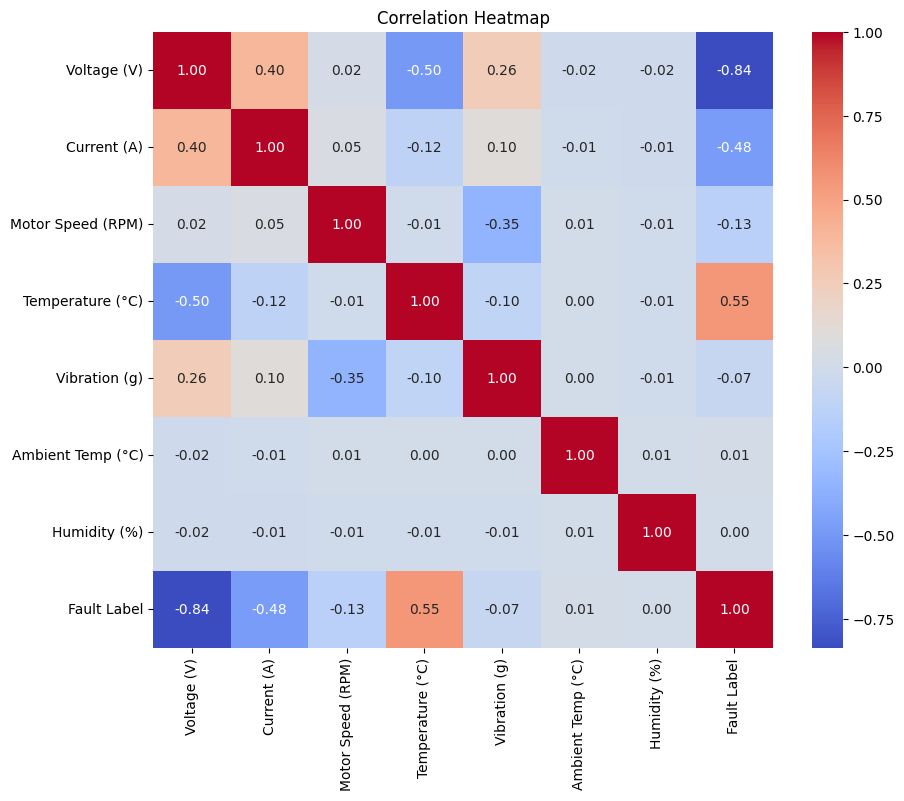

In [21]:
# Correlation heatmap
numeric_df = scaled_dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

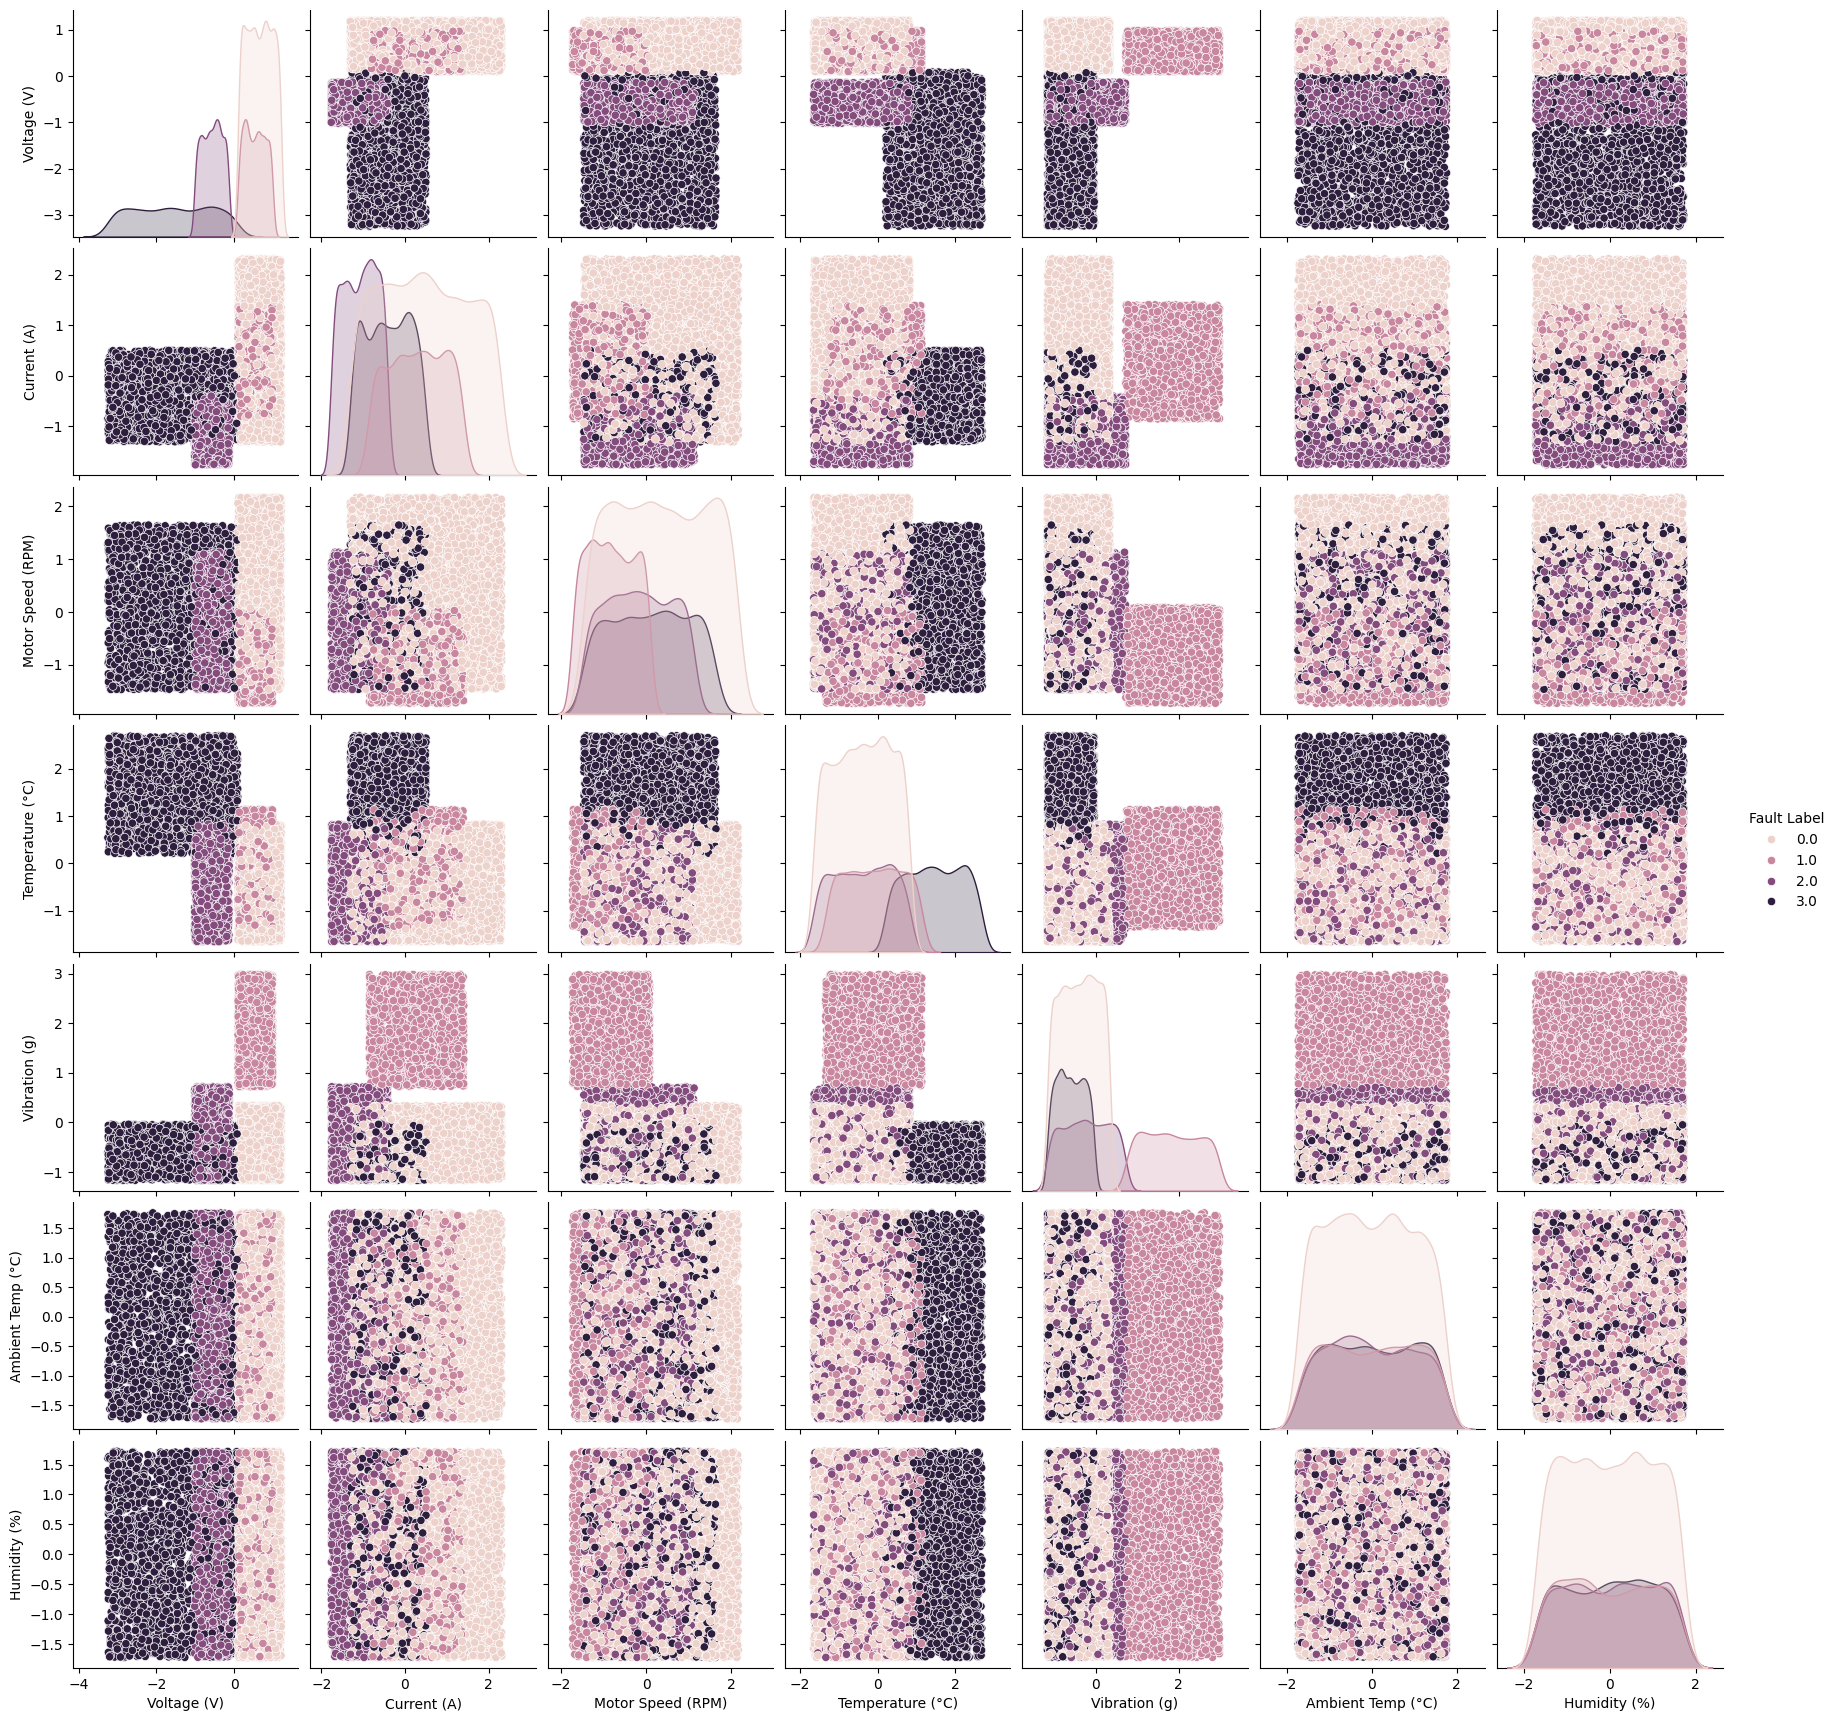

In [23]:
# Pair plot
sns.pairplot(scaled_dataset, hue='Fault Label')
plt.show()

In [24]:
# Split the data into training and testing sets
X = scaled_dataset.drop('Fault Label', axis=1)
y = scaled_dataset['Fault Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.99


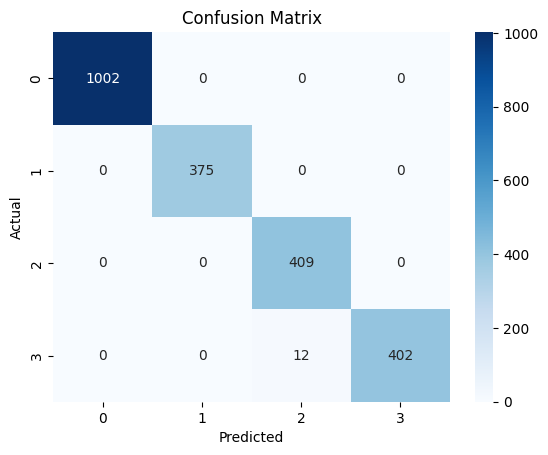

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1002
         1.0       1.00      1.00      1.00       375
         2.0       0.97      1.00      0.99       409
         3.0       1.00      0.97      0.99       414

    accuracy                           0.99      2200
   macro avg       0.99      0.99      0.99      2200
weighted avg       0.99      0.99      0.99      2200



In [27]:

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))